In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import os

The goal of this project is to predict if a mushroom is edible or poisonous based on mushroom's characteristics like color, odor, gill size, and habitat.


In [4]:
df_mushrooms = pd.read_csv("mushroom-dataset/agaricus-lepiota.data", header= None)
column_names = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape",
    "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]
df_mushrooms.columns = column_names
os.makedirs("artifacts", exist_ok=True)
df_mushrooms.to_csv("artifacts/mushrooms_clean.csv", index=False)
df_mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


The dataset consists of 8124 samples and 23 columns.
Each row represents a mushroom species described by categorical features such as cap color, odor, and gill size.
The target variable `class` indicates whether the mushroom is **edible (`e`)** or **poisonous (`p`)**.

In [3]:
df_mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df_mushrooms.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [5]:
df_mushrooms.shape

(8124, 23)

We can see that we have "?" in dataset which represents missing values. We need to change it since Python won't treat those as missing values and it will challenge out preprocessing if we don't change it. We can see we have 2480 missing values in the column "stalk-root". It means that we need to impute them in the future. Since it’s categorical, we might replace missing values with the mode.

In [6]:
df_mushrooms.replace("?", np.nan, inplace = True)
missing_cols = df_mushrooms.columns[df_mushrooms.isnull().any()].tolist()
print(f"Columns with missing values: {missing_cols}")

Columns with missing values: ['stalk-root']


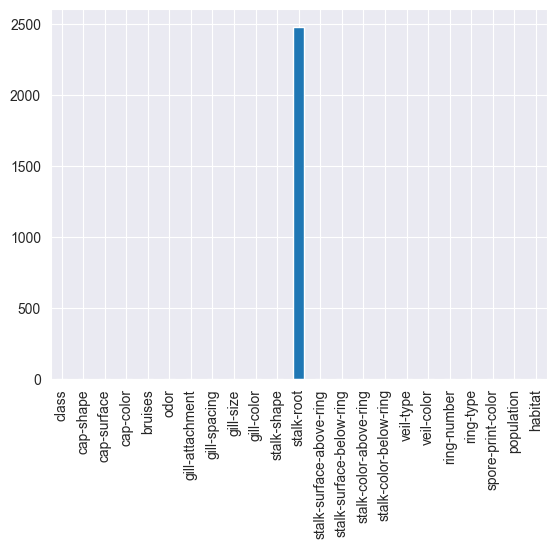

In [7]:
df_mushrooms.isna().sum().plot(kind='bar')
plt.show()

stalk-root    30.526834
dtype: float64


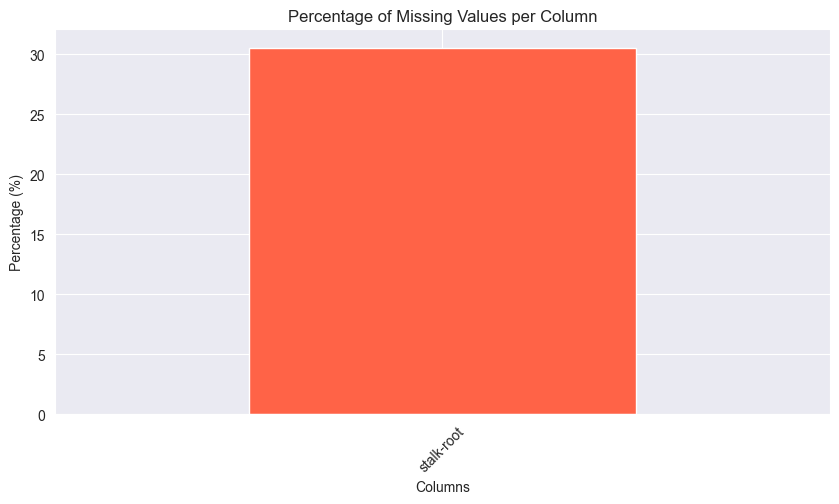

In [8]:
missing_percent = df_mushrooms.isna().mean() * 100

missing_percent = missing_percent.sort_values(ascending=False)

print(missing_percent[missing_percent > 0])

plt.figure(figsize=(10,5))
missing_percent[missing_percent > 0].plot(kind='bar', color='tomato')
plt.title("Percentage of Missing Values per Column")
plt.ylabel("Percentage (%)")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.show()

stalk-root
b      3776
NaN    2480
e      1120
c       556
r       192
Name: count, dtype: int64


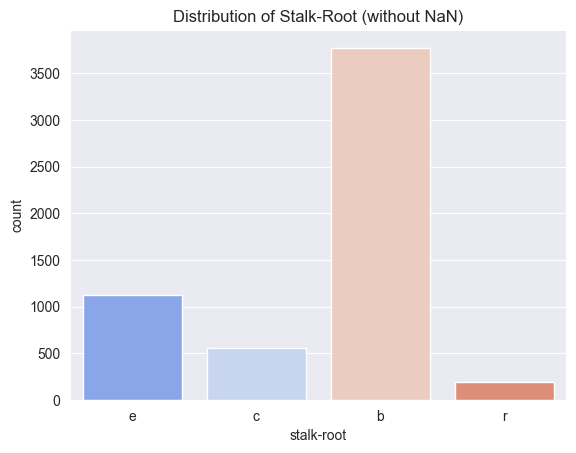

In [9]:
print(df_mushrooms['stalk-root'].value_counts(dropna=False))
sns.countplot(x=df_mushrooms['stalk-root'], hue=df_mushrooms['stalk-root'], palette='coolwarm', dodge=False, legend=False)


plt.title('Distribution of Stalk-Root (without NaN)')
plt.show()

Here we can see how many unique values each columns has and their frequency. Most variables are nominal with between 2–12 unique categories.`odor` and `spore-print-color` show strong variation, while some of them like `veil-type` have little or no variability, suggesting limited predictive power.
Such insights will later inform feature selection.

In [10]:
df_mushrooms.nunique().sort_values(ascending=False)

gill-color                  12
cap-color                   10
odor                         9
stalk-color-below-ring       9
spore-print-color            9
stalk-color-above-ring       9
habitat                      7
cap-shape                    6
population                   6
ring-type                    5
cap-surface                  4
stalk-surface-above-ring     4
veil-color                   4
stalk-surface-below-ring     4
stalk-root                   4
ring-number                  3
gill-attachment              2
class                        2
bruises                      2
gill-size                    2
gill-spacing                 2
stalk-shape                  2
veil-type                    1
dtype: int64

In [11]:
for col in ['cap-shape', 'odor', 'habitat']:
    print(df_mushrooms[col].value_counts(normalize=True).head())
    print("-" * 40)

cap-shape
x    0.450025
f    0.387986
k    0.101920
b    0.055638
s    0.003939
Name: proportion, dtype: float64
----------------------------------------
odor
n    0.434269
f    0.265879
s    0.070901
y    0.070901
a    0.049237
Name: proportion, dtype: float64
----------------------------------------
habitat
d    0.387494
g    0.264402
p    0.140817
l    0.102413
u    0.045298
Name: proportion, dtype: float64
----------------------------------------


Here you can see that we don't have duplicates in our data

In [12]:
df_mushrooms.duplicated().sum()

np.int64(0)

And here you can see exactly what kind of values appear:

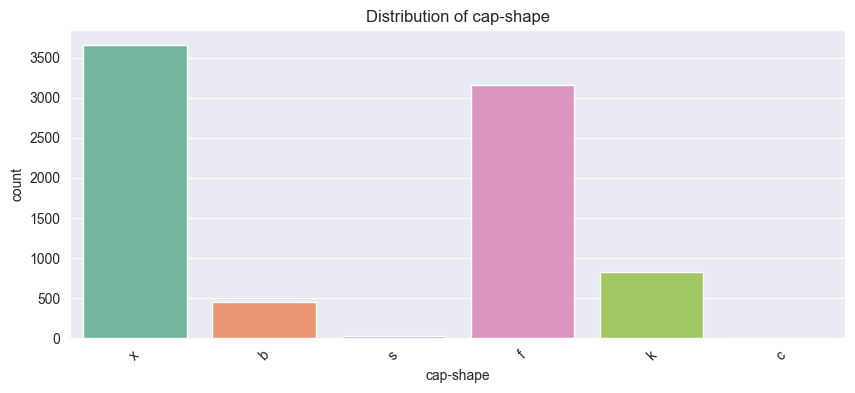

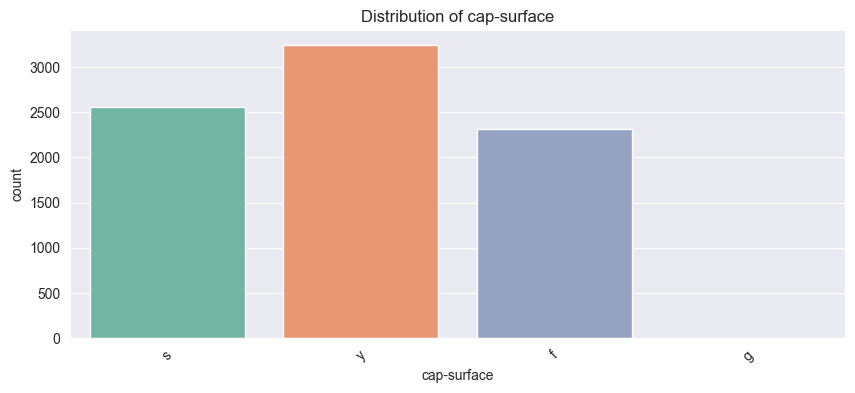

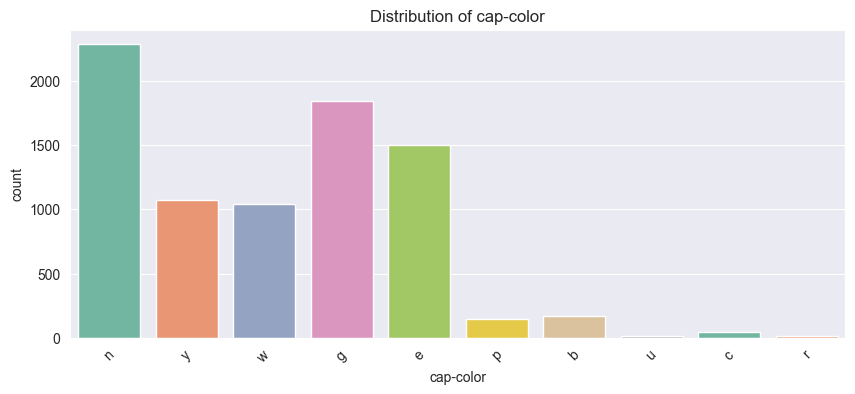

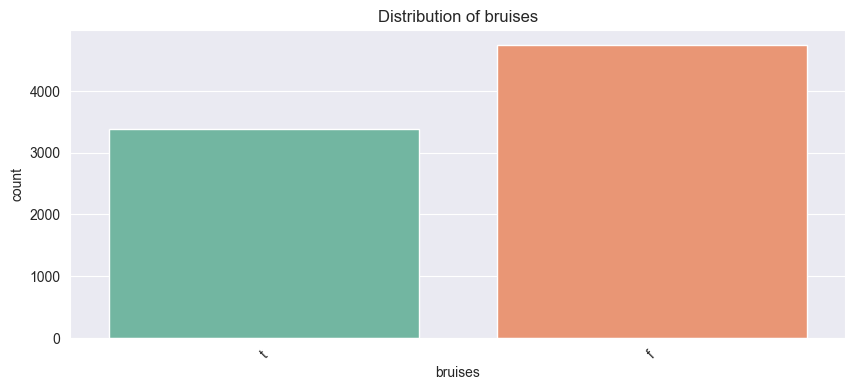

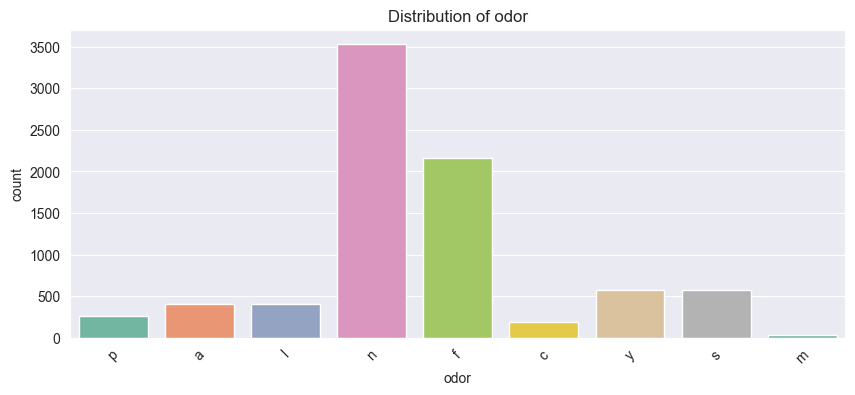

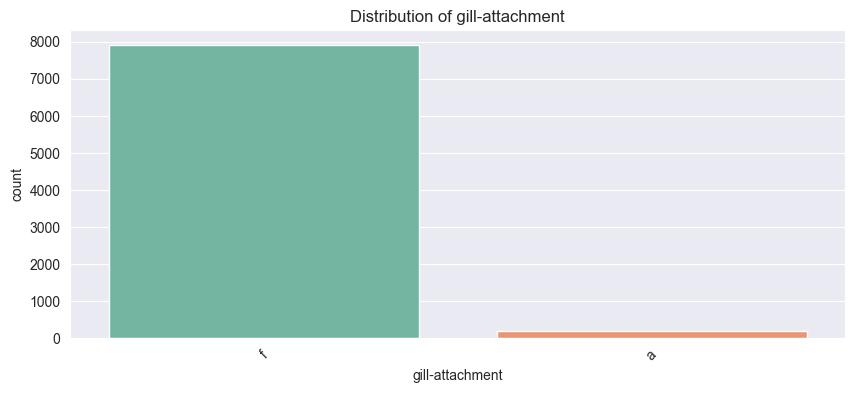

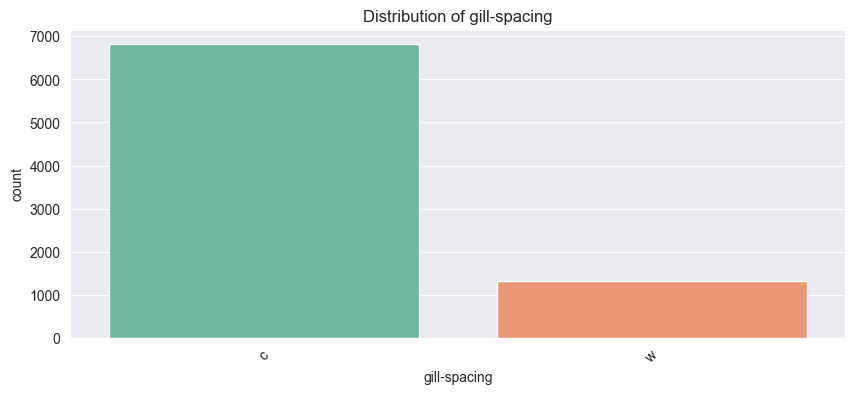

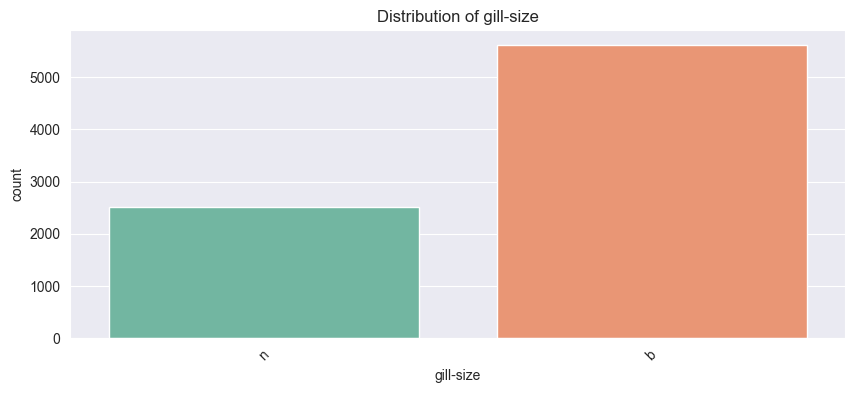

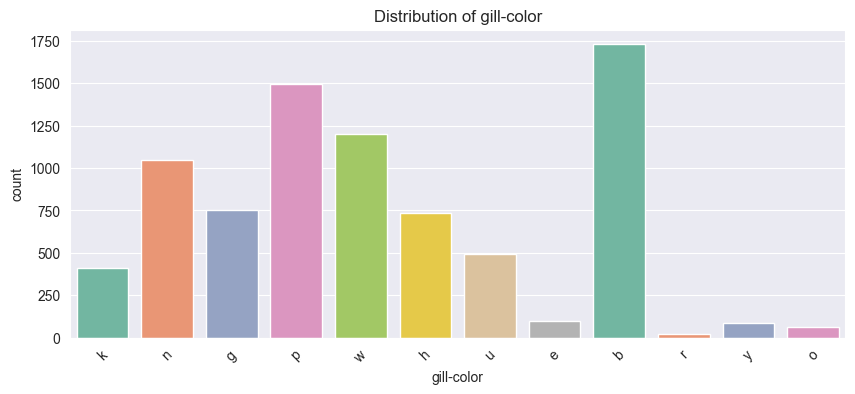

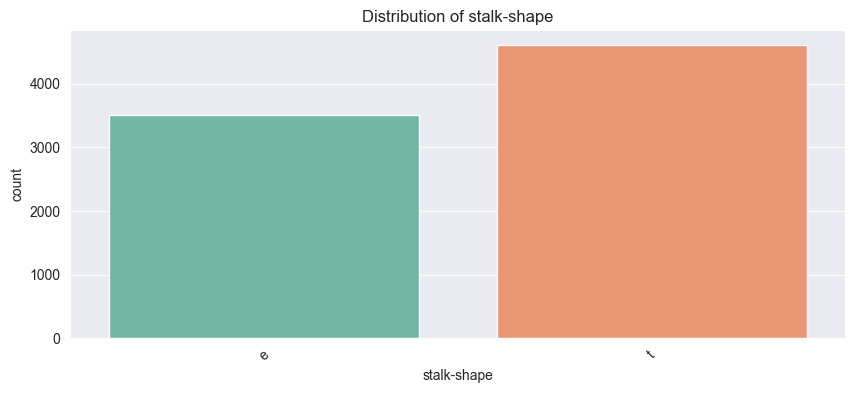

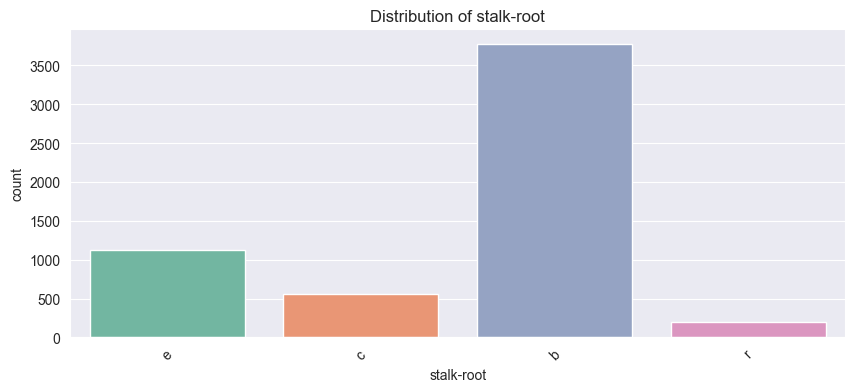

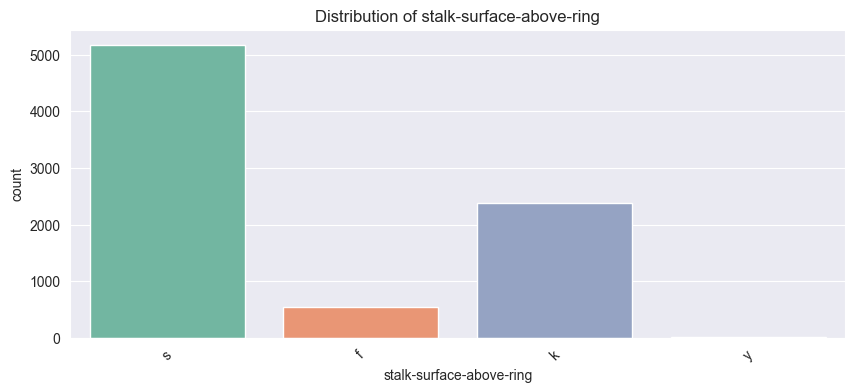

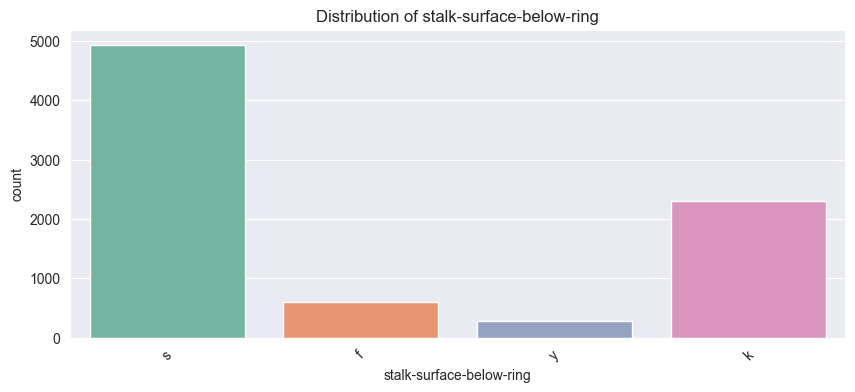

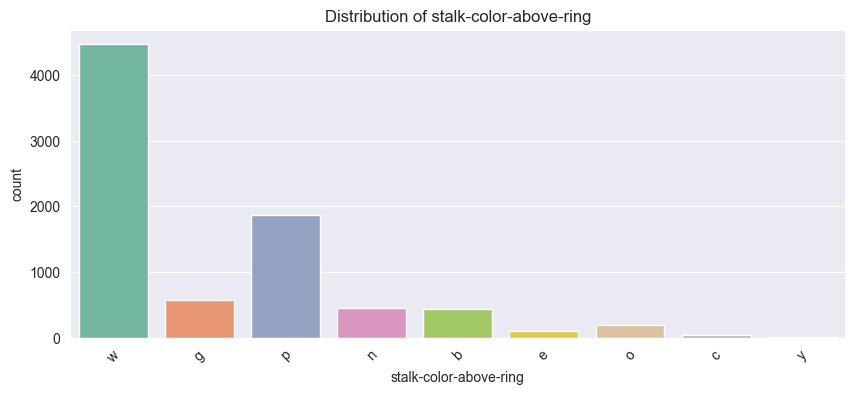

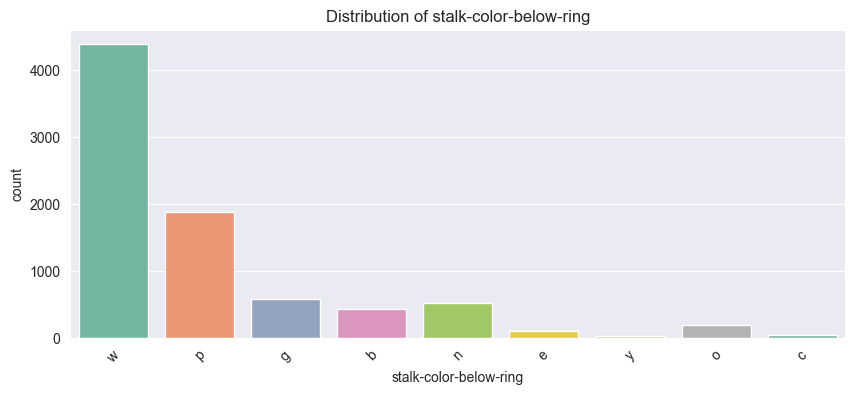

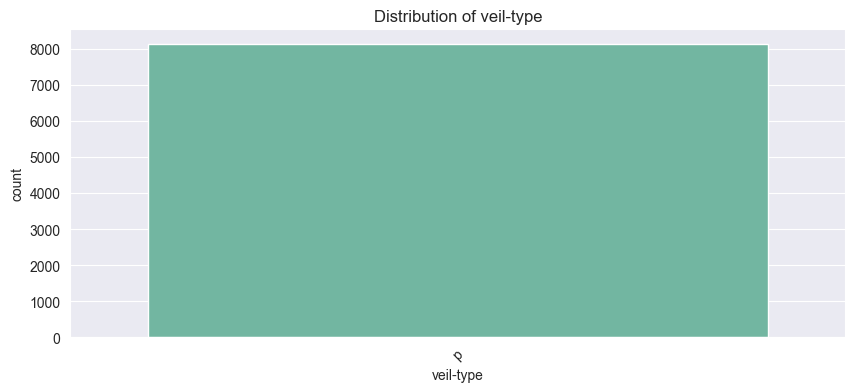

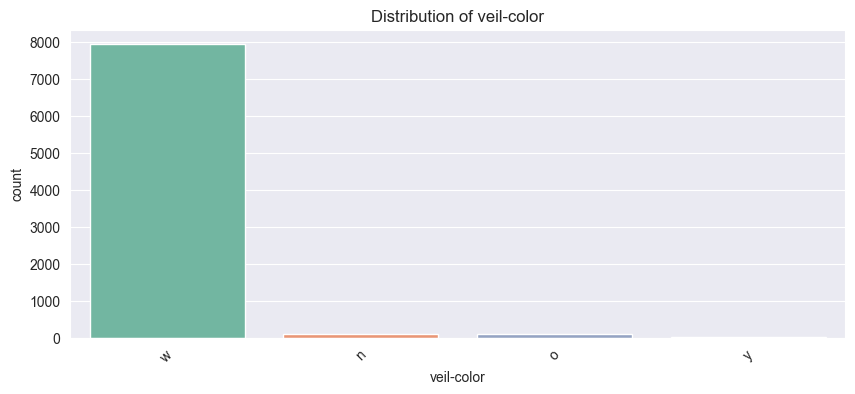

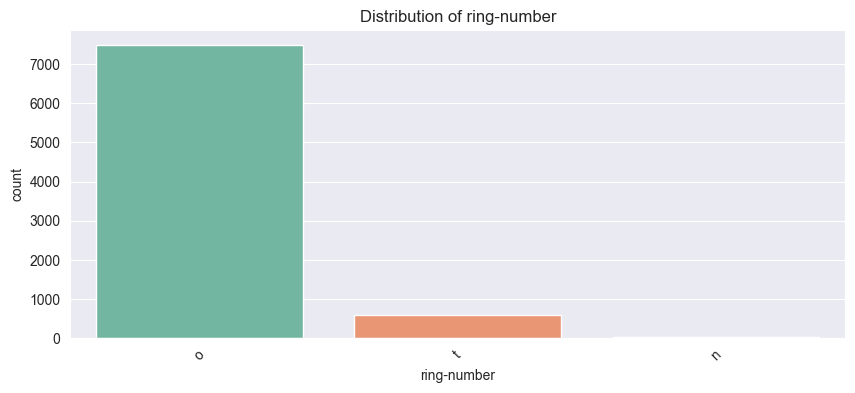

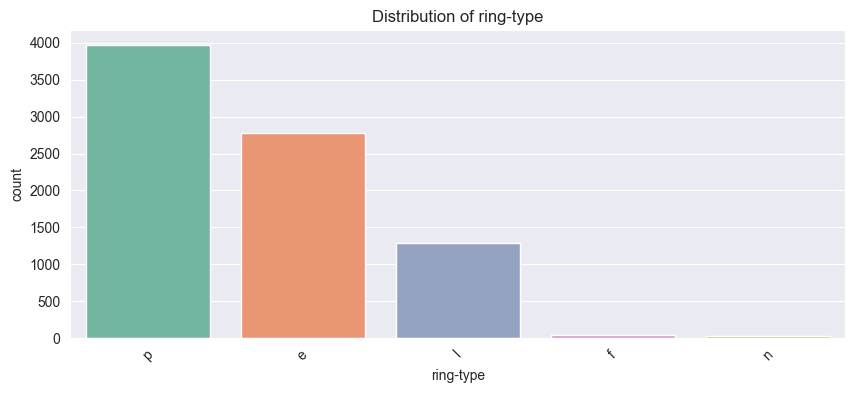

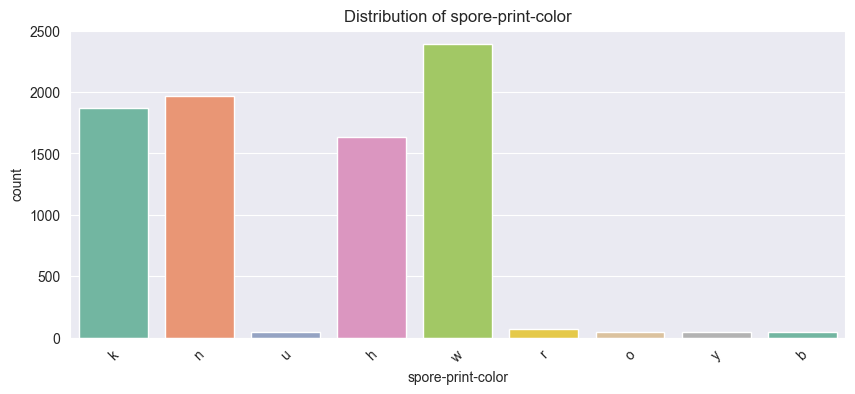

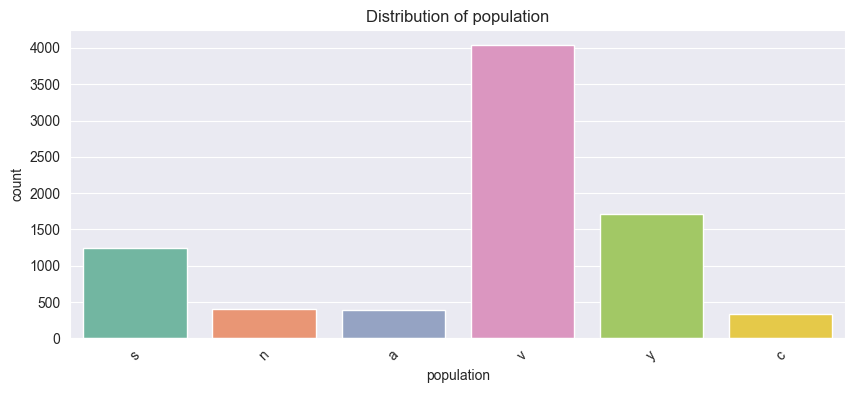

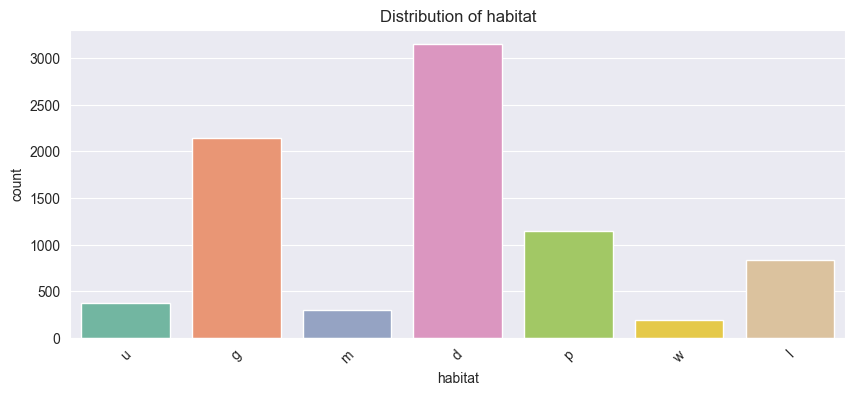

In [13]:
categorical_cols = df_mushrooms.columns.drop('class')
for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, data=df_mushrooms, hue=col, palette='Set2', dodge=False, legend=False)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

The column `class` is our target.
It contains two categories:
- `e`: Edible mushrooms (safe to eat)
- `p`: Poisonous mushrooms (toxic).

Here you can see that the class column is almost equally distributed. Classes are roughly balanced (≈52% e vs 48% p), so oversampling/undersampling is not critical here.

class
e    0.517971
p    0.482029
Name: proportion, dtype: float64


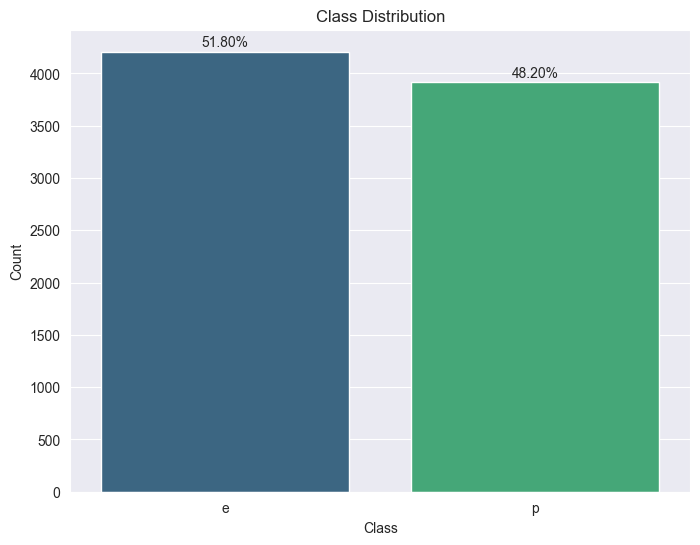

In [14]:
class_counts = df_mushrooms['class'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=class_counts.index, y=class_counts.values, hue = class_counts.index, legend=False, palette='viridis')
plt.title("Class Distribution")
plt.ylabel("Count")
plt.xlabel("Class")

for i, count in enumerate(class_counts.values):
    plt.text(i, count + 50, f"{count/class_counts.sum()*100:.2f}%", ha='center')
print(df_mushrooms['class'].value_counts(normalize=True))
plt.show()

Here we can see the dependency between odor and class and odors usually exists in one class only (except for n, which stands for none). Some odors only appear in poisonous mushrooms (e.g., c, f, m, p, s, y), making odor a highly predictive feature.

<Axes: title={'center': 'Mushroom Class vs Odor Heatmap'}, xlabel='odor', ylabel='class'>

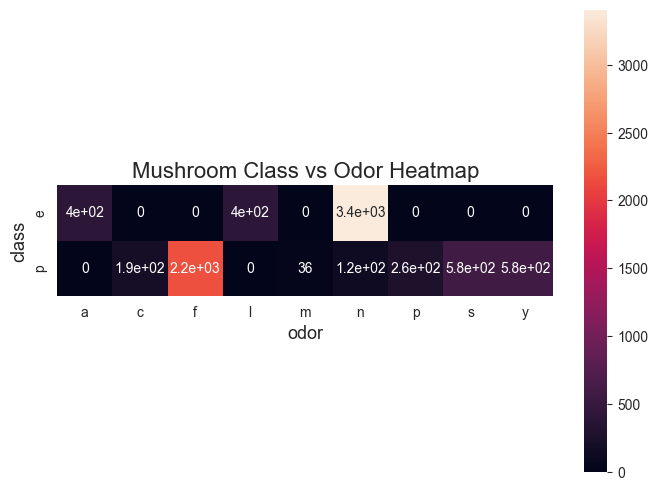

In [15]:
cross_tab_class = pd.crosstab(df_mushrooms["class"], df_mushrooms["odor"])
plt.figure(figsize=(8, 6))
plt.title("Mushroom Class vs Odor Heatmap", fontsize=16)
plt.xlabel("Odor", fontsize=13)
plt.ylabel("Class", fontsize=13)
sns.heatmap(cross_tab_class, annot=True, square=True)

Here we can see the dependency between cap-color and target class. The cap-color are almost distributed equally which suggests it's not a very important feature.

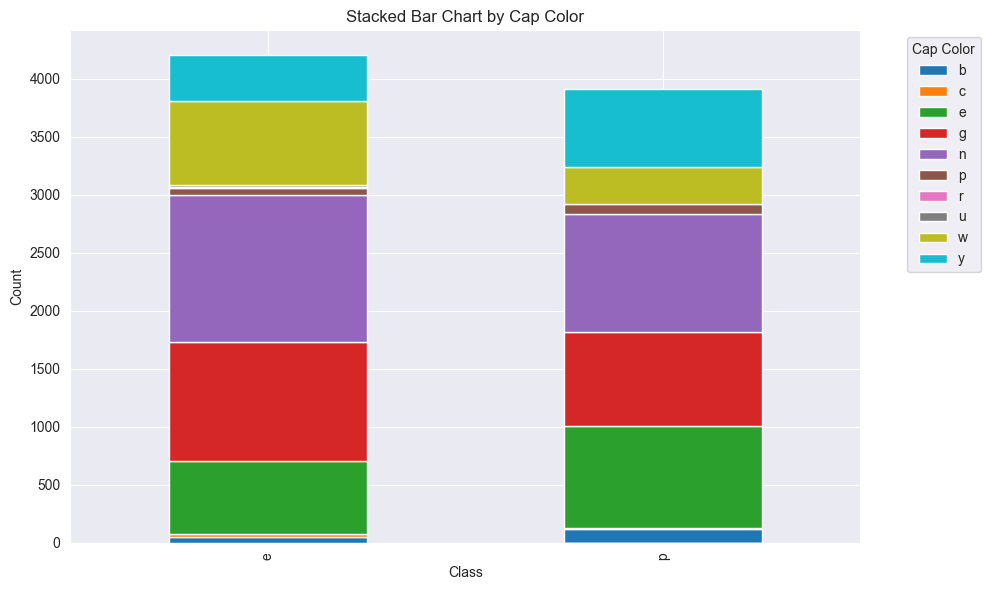

In [16]:
pivot = pd.crosstab(df_mushrooms['class'], df_mushrooms['cap-color'])

pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Stacked Bar Chart by Cap Color')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Cap Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Here we are checking if our data has rare categories because it can affect model generalization.
We might combine rare values into "Other" during preprocessing.

In [17]:
for col in categorical_cols:
    freq = df_mushrooms[col].value_counts(normalize=True)
    rare = freq[freq < 0.01]
    if not rare.empty:
        print(f"{col} has rare categories:\n{rare}\n")

cap-shape has rare categories:
cap-shape
s    0.003939
c    0.000492
Name: proportion, dtype: float64

cap-surface has rare categories:
cap-surface
g    0.000492
Name: proportion, dtype: float64

cap-color has rare categories:
cap-color
c    0.005416
u    0.001969
r    0.001969
Name: proportion, dtype: float64

odor has rare categories:
odor
m    0.004431
Name: proportion, dtype: float64

gill-color has rare categories:
gill-color
o    0.007878
r    0.002954
Name: proportion, dtype: float64

stalk-surface-above-ring has rare categories:
stalk-surface-above-ring
y    0.002954
Name: proportion, dtype: float64

stalk-color-above-ring has rare categories:
stalk-color-above-ring
c    0.004431
y    0.000985
Name: proportion, dtype: float64

stalk-color-below-ring has rare categories:
stalk-color-below-ring
c    0.004431
y    0.002954
Name: proportion, dtype: float64

veil-color has rare categories:
veil-color
y    0.000985
Name: proportion, dtype: float64

ring-number has rare categories:
ri


Here we can see that broad gills (b) dominate in edible mushrooms, while narrow gills (n) occur mostly in poisonous ones.

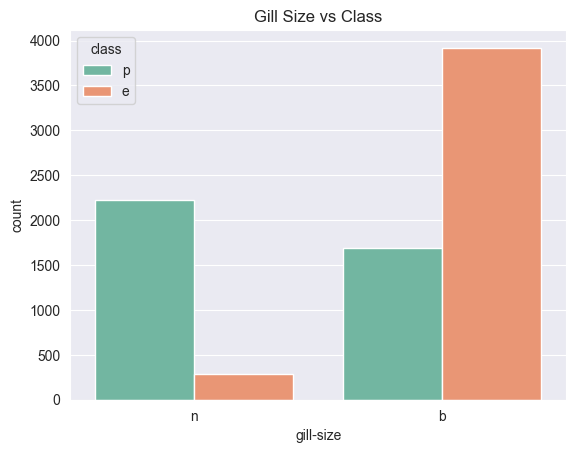

In [18]:
sns.countplot(x='gill-size', hue='class', data=df_mushrooms, palette='Set2')
plt.title('Gill Size vs Class')
plt.show()

And here we can see that green(r) spore prints are almost all poisonous while o,y,b(orange, yellow, buff) are all edible. Also black(k) and brown(n) are more likely to be edible than not. At the same time, white(w) and chocolate(h) are likely to be poisonous.

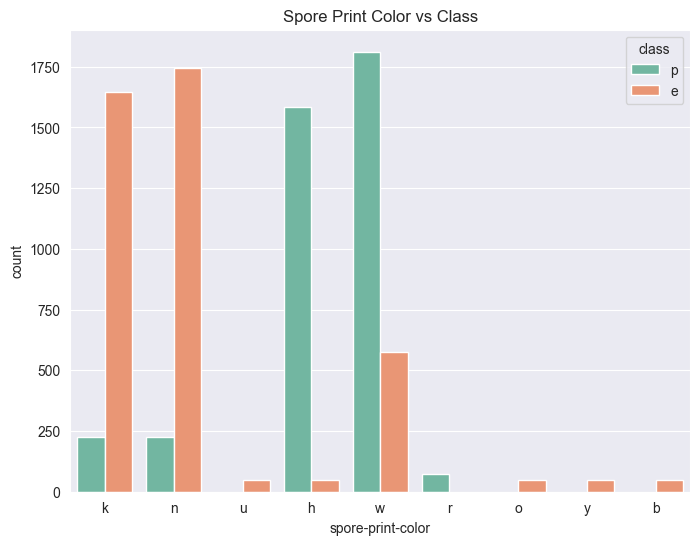

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(x='spore-print-color', hue='class', data=df_mushrooms, palette='Set2')
plt.title('Spore Print Color vs Class')
plt.show()

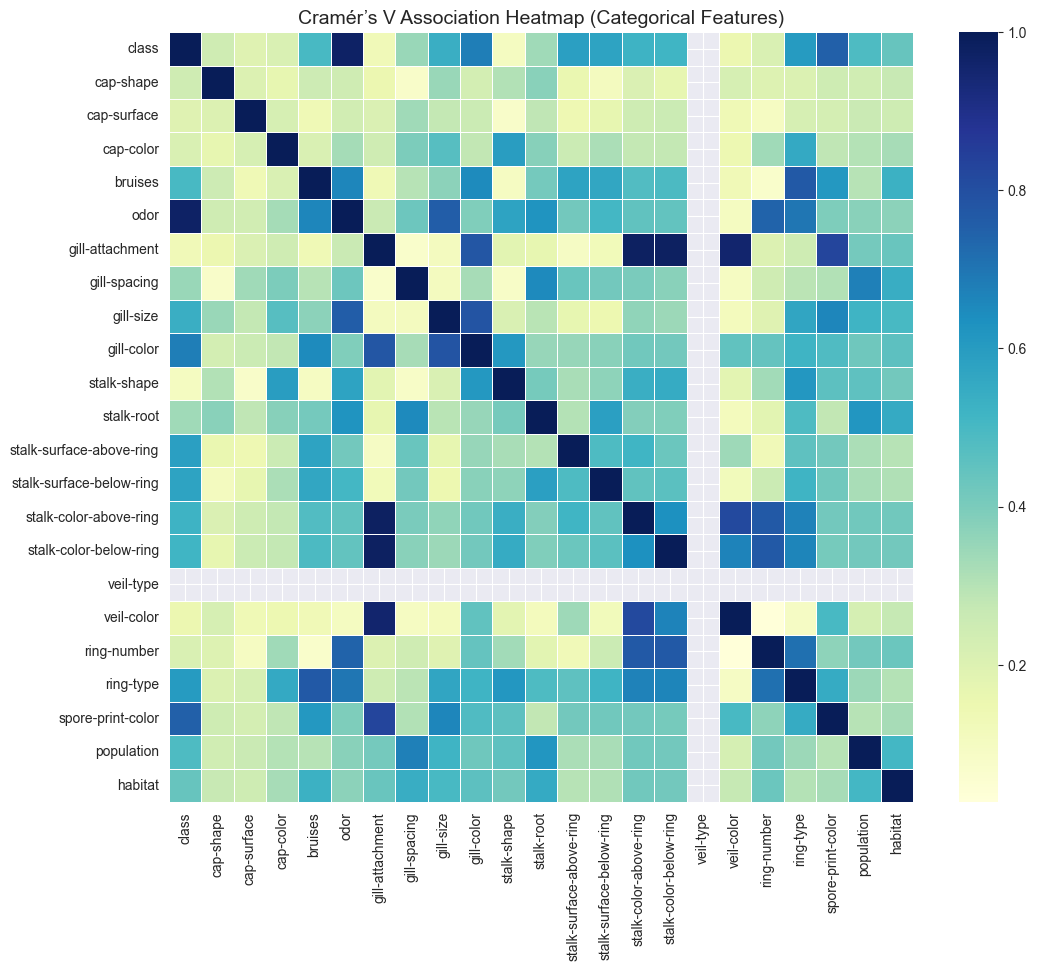

In [20]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.shape[0] < 2 or confusion_matrix.shape[1] < 2:
        return np.nan
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1))/(n - 1))
    rcorr = r - ((r - 1)**2)/(n - 1)
    kcorr = k - ((k - 1)**2)/(n - 1)
    denom = min((kcorr - 1), (rcorr - 1))
    if denom == 0:
        return np.nan
    return np.sqrt(phi2corr / denom)

cat_cols = df_mushrooms.columns
assoc_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)

for col1 in cat_cols:
    for col2 in cat_cols:
        assoc_matrix.loc[col1, col2] = cramers_v(df_mushrooms[col1], df_mushrooms[col2])

plt.figure(figsize=(12, 10))
sns.heatmap(assoc_matrix, cmap="YlGnBu", linewidths=0.5)
plt.title("Cramér’s V Association Heatmap (Categorical Features)", fontsize=14)
plt.show()

###  Summary of Key Insights

- The dataset has 8124 values and 22 categorical predictors + one target variable.
- Only one feature (`stalk-root`) has missing values (~30%).
- The target variable is balanced (≈52% edible, 48% poisonous).
- Strongly discriminative features include **odor**, **spore-print-color**, and **gill-size**.
- Some features like **veil-type** have little variability and may later be dropped.
- Visual and statistical analysis confirms that certain odor types and spore colors are exclusive to one class.
- Most feature pairs fall in the 0.2–0.6 range, meaning moderate associations.
